# ClusterPC simulation 1

This notebook runs a simulation comparing PC with Cluster-PC. It uses the same graph and distribtuion methods and focuses on showing the effects of number of clusters, edges and alpha on the algorithms

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tqdm")

import logging
logging.getLogger('rpy2').setLevel(logging.WARNING)

# Importing dependencies
%load_ext autoreload
%autoreload 2
import itertools
import yaml
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from clustercausal.experiments.ExperimentRunner import ExperimentRunner
from clustercausal.utils.Utils import *
from clustercausal.experiments.Utils import load_experiment_folder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The cell below executes a simulation according to the specified yaml file. To run several yaml files, it is recommended to modify the run_gridsearch.py file and run the simulation in the terminal with 

>```python clustercausal\experiments\run_gridsearch.py```

Depending on the number of experiments, the simulation can take a while. Simulation 1 takes around 60 minutes on a standard laptop. A sample yaml of all possible configurations can be found in ```clustercausal\experiments\configs\cluster_pc_all_param_configs.yaml```. It is not recommended to run that file, it is for reference only. 

To run the experiment, uncomment the code in the cell below. 

In [5]:
# config_path = 'clustercausal\experiments\configs\cluster_pc_simulation_1.yaml'
# config_path = config_path.replace('\\', '/')
# experiment = ExperimentRunner(config_path)
# experiment.run_gridsearch_experiment()

## Evaluating the simulation

First load the data. Make sure that the _results folder is empty, otherwise old experiments will also be loaded. Consider moving old experiments to a new folder _results_storage. 

In [83]:
# Can take a longer time depending on the numer of experiments, ca. 40sec for the 'mass_simulation' experiment
# This loads all experiment folder present in _results
# data = load_experiment_folder('clustercausal\experiments\_results')

# I had a different folder structure so I used
# data = load_experiment_folder('clustercausal\experiments\_results_storage\ClusterPC_simulation_1')

# To load the dataframe directly, use
data = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\data_clusterPC_simulation_1.pkl')

# If one wants to load only specific simulation folders, put these in a separate folder named e.g. my_experiment and load
# data = load_experiment_folder('clustercausal\experiments\_results\my_experiment')
# where my_experiment contains the simulations of interest

In [7]:
# data_all also contains runs with n_clusters = 1
data_all = data.copy()
data_all.to_pickle('clustercausal\experiments\_results_storage\data_clusterPC_simulation_1.pkl')
data = data[data['n_clusters'] != 1]
# To look only at clusterings where at least two clusters were non-adjacent
data_nonadj_clusters = data[data['cluster_connectivity'] != 1]

In [8]:
data_all.describe()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,...,alpha,cluster_connectivity,empty_graph_shd,n_clusters,n_edges,n_nodes,noise_scale,sample_size,true_sid_lower,true_sid_upper
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1742.000000,1742.000000,1750.000000,...,1750.000000,1500.000000,1750.000000,1750.000000,1750.000000,1750.0,1750.0,1750.0,0.0,0.0
mean,0.553241,36.808000,2.563429,0.878944,0.464748,48.666286,16.962286,0.309004,0.544795,45.420571,...,0.182000,0.870283,53.770286,4.000000,65.000000,15.0,1.0,1000.0,NaN,NaN
std,0.221598,31.239768,3.051348,0.123466,0.272456,31.866064,4.188901,0.188537,0.163496,32.890904,...,0.178646,0.192271,32.800118,2.000572,47.762994,0.0,0.0,0.0,NaN,NaN
min,0.157895,0.000000,0.000000,0.176471,0.085714,0.000000,5.000000,0.017544,0.071429,1.000000,...,0.010000,0.142857,6.000000,1.000000,15.000000,15.0,1.0,1000.0,NaN,NaN
25%,0.359375,8.000000,0.000000,0.809524,0.223684,25.000000,14.000000,0.155039,0.444444,15.000000,...,0.050000,0.790476,26.000000,2.000000,30.000000,15.0,1.0,1000.0,NaN,NaN
50%,0.517241,29.000000,2.000000,0.900000,0.382353,54.000000,17.000000,0.254257,0.545455,38.000000,...,0.100000,1.000000,47.000000,4.000000,50.000000,15.0,1.0,1000.0,NaN,NaN
75%,0.755556,61.000000,4.000000,1.000000,0.700000,77.000000,20.000000,0.439024,0.666667,71.000000,...,0.250000,1.000000,77.000000,6.000000,80.000000,15.0,1.0,1000.0,NaN,NaN
max,1.000000,96.000000,29.000000,1.000000,1.000000,99.000000,32.000000,0.952381,0.956522,105.000000,...,0.500000,1.000000,105.000000,7.000000,150.000000,15.0,1.0,1000.0,NaN,NaN


It is possible to load the specific graphs of one experiment: 

In [9]:
# # Change this according to the experiment folder you want to load - this specific folder is not included in the repo
# experiment_folder = 'clustercausal\experiments\_results\ClusterPC_simulation_1\erdos_renyi_15_nodes_15_edges_1_clusters_exp14-16-42-713'
# base_est_graph, cluster_est_graph, cluster_dag = load_experiment_graphs(experiment_folder)
# cluster_dag.true_dag.draw_pydot_graph()

### Data exploration

In [10]:
pd.set_option('display.max_columns', None)
data[:10]

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,dag_method,distribution_type,edge_ratios,empty_graph_shd,indep_test,n_clusters,n_edges,n_nodes,noise_scale,sample_size,scm_method,seed,true_sid_lower,true_sid_upper,weight_range
50,0.278689,88.0,0.0,1.0,0.161905,0.0,17.0,0.152542,0.600000,96.0,8.0,4.0,4.0,0.692308,0.692308,0.085714,0.529412,116.0,204.0,9.0,9.0,92.0,NaN,0.306452,86.0,0.0,1.0,0.180952,0.0,19.0,0.195122,0.648649,93.0,7.0,6.0,6.0,0.666667,0.666667,0.114286,0.631579,114.0,200.0,12.0,12.0,92.0,NaN,0.278689,88.0,0.0,1.0,0.161905,0.0,17.0,0.152542,0.600000,96.0,8.0,4.0,4.0,0.692308,0.692308,0.085714,0.529412,116.0,204.0,9.0,9.0,92.0,NaN,6815.0,5775.0,0.01,1.0,erdos_renyi,gauss,"[0.75, 1.0, 1.0]",105.0,fisherz,2.0,150.0,15.0,1.0,1000.0,linear,None,NaN,NaN,"(-1, 2)"
51,0.320000,85.0,0.0,1.0,0.190476,0.0,20.0,0.116667,0.400000,98.0,13.0,8.0,8.0,0.466667,0.466667,0.066667,0.350000,112.0,197.0,7.0,7.0,93.0,NaN,0.359375,82.0,0.0,1.0,0.219048,0.0,23.0,0.188976,0.533333,93.0,11.0,10.0,10.0,0.545455,0.545455,0.114286,0.521739,110.0,192.0,12.0,12.0,92.0,NaN,0.320000,85.0,0.0,1.0,0.190476,0.0,20.0,0.116667,0.400000,98.0,13.0,8.0,8.0,0.466667,0.466667,0.066667,0.350000,112.0,197.0,7.0,7.0,93.0,NaN,5609.0,4969.0,0.05,1.0,erdos_renyi,gauss,"[1.0, 1.0, 1.0]",105.0,fisherz,2.0,150.0,15.0,1.0,1000.0,linear,None,NaN,NaN,"(-1, 2)"
52,0.235294,91.0,0.0,1.0,0.133333,0.0,14.0,0.120690,0.560000,98.0,7.0,4.0,4.0,0.636364,0.636364,0.066667,0.500000,116.0,207.0,7.0,7.0,95.0,NaN,0.372093,81.0,0.0,1.0,0.228571,0.0,24.0,0.265625,0.723404,88.0,7.0,6.0,6.0,0.739130,0.739130,0.161905,0.708333,114.0,195.0,17.0,17.0,87.0,NaN,0.235294,91.0,0.0,1.0,0.133333,0.0,14.0,0.120690,0.560000,98.0,7.0,4.0,4.0,0.636364,0.636364,0.066667,0.500000,116.0,207.0,7.0,7.0,95.0,NaN,9799.0,6004.0,0.10,1.0,erdos_renyi,gauss,"[1.0, 1.0, 1.0]",105.0,fisherz,2.0,150.0,15.0,1.0,1000.0,linear,None,NaN,NaN,"(-1, 2)"
53,0.320000,85.0,0.0,1.0,0.190476,0.0,20.0,0.178862,0.578947,94.0,9.0,7.0,7.0,0.611111,0.611111,0.104762,0.550000,113.0,198.0,11.0,11.0,92.0,NaN,0.346457,83.0,0.0,1.0,0.209524,0.0,22.0,0.222222,0.651163,91.0,8.0,7.0,7.0,0.666667,0.666667,0.133333,0.636364,113.0,196.0,14.0,14.0,90.0,NaN,0.320000

The data contains the following information on the settings of the simulation:

In [11]:
# settings_results = {
#             "n_nodes": simulation.n_nodes,
#             "n_edges": simulation.n_edges,
#             "n_clusters": simulation.n_clusters,
#             "edge_ratios": edge_ratios,
#             "dag_method": simulation.dag_method,
#             "distribution_type": simulation.distribution_type,
#             "scm_method": simulation.scm_method,
#             "weight_range": simulation.weight_range,
#             "sample_size": simulation.sample_size,
#             "seed": simulation.seed,
#             "noise_scale": simulation.noise_scale,
#             # "n_c_edges": simulation.n_c_edges,
#             "alpha": simulation.alpha,
#             "true_sid_lower": true_sid_bounds["sid_lower"],
#             "true_sid_upper": true_sid_bounds["sid_upper"],
#             "indep_test": self.indep_test,
#             "empty_graph_shd": empty_graph_shd,
#             "cluster_connectivity": cluster_connectivity,
#             "C-PC indep tests": clust_no_indep_tests,
#             "Base indep tests": one_clust_no_indep_tests,
#         }

In addition the metrics for the runs are as follows (where pruned is the results of PC but edges that could be removed from C-DAG are removed):

In [12]:
# cluster_adjacency_confusion,
# cluster_arrow_confusion,
# cluster_shd,
# cluster_sid,

# base_adjacency_confusion,
# base_arrow_confusion,
# base_shd,
# base_sid,

# pruned_base_adjacency_confusion,
# pruned_base_arrow_confusion,
# pruned_base_shd,
# pruned_base_sid,

Pruned and base results are identical, as it seems PC never failed to delete an edge between non-adjacent clusters. 

In [13]:
data_all.describe()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,empty_graph_shd,n_clusters,n_edges,n_nodes,noise_scale,sample_size,true_sid_lower,true_sid_upper
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1742.000000,1742.000000,1750.000000,1750.000000,1750.000000,1750.000000,1749.000000,1749.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,0.0,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1749.000000,1749.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,0.0,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1742.000000,1742.000000,1750.000000,1750.000000,1750.000000,1750.000000,1749.000000,1749.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,0.0,1750.000000,1750.00000,1750.000000,1500.000000,1750.000000,1750.000000,1750.000000,1750.0,1750.0,1750.0,0.0,0.0
mean,0.553241,36.808000,2.563429,0.878944,0.464748,48.666286,16.962286,0.309004,0.544795,45.420571,8.612571,7.785143,5.470286,0.543915,0.624951,0.242069,0.489320,163.444571,202.567429,8.349714,8.349714,44.841714,NaN,0.626665,30.944000,4.115429,0.851145,0.555301,47.114286,22.826286,0.520806,0.811838,35.658857,4.714857,7.049714,3.147429,0.717862,0.845210,0.455918,0.785157,164.180000,199.026286,18.111429,18.111429,38.206857,NaN,0.553241,36.808000,2.563429,0.878944,0.464748,48.666286,16.962286,0.309004,0.544795,45.420571,8.612571,7.785143,5.470286,0.543915,0.624951,0.242069,0.489320,163.444571,202.567429,8.349714,8.349714,44.841714,NaN,4981.106857,3062.47200,0.182000,0.870283,53.770286,4.000000,65.000000,15.0,1.0,1000.0,NaN,NaN
std,0.221598,31.239768,3.051348,0.123466,0.272456,31.866064,4.188901,0.188537,0.163496,32.890904,3.273796,4.614171,3.581762,0.197970,0.198881,0.183107,0.159889,34.006912,7.116427,3.386819,3.386819,32.190357,NaN,0.174526,27.274293,4.361763,0.139437,0.243887,31.422981,8.527532,0.211821,0.169698,29.561899,3.695276,4.743909,3.027222,0.177131,0.159703,0.253049,0.183784,33.321161,9.852276,8.

In [14]:
data.describe()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,empty_graph_shd,n_clusters,n_edges,n_nodes,noise_scale,sample_size,true_sid_lower,true_sid_upper
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1493.000000,1493.000000,1500.000000,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,0.0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.00000,1500.000000,0.0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1493.000000,1493.000000,1500.000000,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,0.0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.0,1500.0,1500.0,0.0,0.0
mean,0.553288,36.842000,2.520667,0.879792,0.464224,48.716000,16.921333,0.309621,0.545378,45.432000,8.590000,7.717333,5.442667,0.544303,0.625573,0.242483,0.489750,163.519333,202.63600,8.331333,8.331333,44.805333,NaN,0.638950,30.000667,4.331333,0.847359,0.569870,46.905333,23.762667,0.556580,0.856748,34.043333,4.042667,6.859333,2.732667,0.747241,0.882542,0.491974,0.834893,164.377333,198.504667,19.72000,19.72000,37.064667,NaN,0.553288,36.842000,2.520667,0.879792,0.464224,48.716000,16.921333,0.309621,0.545378,45.432000,8.590000,7.717333,5.442667,0.544303,0.625573,0.242483,0.489750,163.519333,202.63600,8.331333,8.331333,44.805333,NaN,4980.377333,2741.970000,0.182000,0.870283,53.763333,4.500000,65.00000,15.0,1.0,1000.0,NaN,NaN
std,0.222022,31.246844,2.886369,0.120454,0.273155,31.898135,4.168941,0.189167,0.164403,32.940402,3.289952,4.486147,3.571631,0.196030,0.199407,0.184242,0.160928,34.040047,7.09834,3.368251,3.368251,32.225783,NaN,0.162728,26.446278,4.399067,0.138970,0.236468,31.376478,8.696173,0.194065,0.123545,28.709051,3.330101,4.617405,2.698281,0.152522,0.116668,0.245832,0.134736,33.235835,10.133102,7.74607,7.

The precision of C-PC is slightly lower, but the recall is higher. In total C-PC has a higher F1 score.

In [15]:
data_nonadj_clusters.describe()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,empty_graph_shd,n_clusters,n_edges,n_nodes,noise_scale,sample_size,true_sid_lower,true_sid_upper
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,626.000000,626.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,0.0,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,0.0,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,626.000000,626.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,0.0,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.0,629.0,629.0,0.0,0.0
mean,0.681248,17.108108,3.014308,0.855379,0.618753,69.084261,15.793323,0.400365,0.585351,24.618442,7.510334,6.972973,4.248013,0.583936,0.684567,0.330022,0.519656,185.125596,204.958665,8.282989,8.282989,24.370429,NaN,0.733210,12.658188,5.567568,0.801484,0.720603,66.531002,20.243243,0.686749,0.926280,14.553259,1.895072,6.551669,1.273450,0.761427,0.940828,0.665587,0.913502,185.546900,203.483307,18.348172,18.348172,19.499205,NaN,0.681248,17.108108,3.014308,0.855379,0.618753,69.084261,15.793323,0.400365,0.585351,24.618442,7.510334,6.972973,4.248013,0.583936,0.684567,0.330022,0.519656,185.125596,204.958665,8.282989,8.282989,24.370429,NaN,3390.599364,1593.669316,0.188458,0.690658,32.901431,5.583466,35.524642,15.0,1.0,1000.0,NaN,NaN
std,0.189993,18.266893,3.262622,0.130245,0.248258,20.081146,4.003806,0.184497,0.165905,19.683662,3.016722,4.901992,3.220483,0.216855,0.202426,0.184656,0.165919,21.964544,6.506112,3.392486,3.392486,20.233851,NaN,0.135662,14.137491,4.815775,0.146020,0.193253,20.622581,7.187634,0.161473,0.081777,15.360294,2.059263,5.180127,1.699085,0.157813,0.077800,0.209378,0.090900,21.695485,8.022567,6.506091,6.506091,15.991103,NaN,0.189993,18.266893,3.262622,0.130245,0.24825

In [16]:
prec_recall_metrics_with_pruned = ['base_adj_precision', 'pruned_base_adj_precision', 'cluster_adj_precision', \
           'base_adj_recall', 'pruned_base_adj_recall','cluster_adj_recall', \
           'base_adj_f1_score', 'pruned_base_adj_f1_score', 'cluster_adj_f1_score']
prec_recall_metrics = ['base_adj_precision', 'cluster_adj_precision', \
              'base_adj_recall', 'cluster_adj_recall', \
                'base_adj_f1_score', 'cluster_adj_f1_score']
data[prec_recall_metrics].describe()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.879792,0.847359,0.464224,0.569870,0.553288,0.638950
std,0.120454,0.138970,0.273155,0.236468,0.222022,0.162728
min,0.176471,0.142857,0.085714,0.114286,0.157895,0.205128
25%,0.809524,0.774798,0.223684,0.363636,0.359375,0.513699
50%,0.900000,0.857143,0.376389,0.523810,0.516685,0.620204
75%,1.000000,1.000000,0.693144,0.777778,0.755556,0.765019
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
arrow_metrics = ['base_arrow_precision', 'cluster_arrow_precision', \
                'base_arrow_recall', 'cluster_arrow_recall', \
                'base_arrow_f1_score', 'cluster_arrow_f1_score']
data_all[arrow_metrics].describe()

,base_arrow_precision,cluster_arrow_precision,base_arrow_recall,cluster_arrow_recall,base_arrow_f1_score,cluster_arrow_f1_score
count,1749.000000,1750.000000,1750.000000,1750.000000,1742.000000,1749.000000
mean,0.543915,0.717862,0.242069,0.455918,0.309004,0.520806
std,0.197970,0.177131,0.183107,0.253049,0.188537,0.211821
min,0.000000,0.000000,0.000000,0.000000,0.017544,0.033333
25%,0.416667,0.611111,0.095238,0.257251,0.155039,0.372093
50%,0.526316,0.743223,0.176471,0.402881,0.254257,0.510067
75%,0.666667,0.843339,0.366667,0.638889,0.439024,0.666667
max,1.000000,1.000000,0.909091,1.000000,0.952381,1.000000


In [18]:
indep_test_metrics = ['Base indep tests', 'C-PC indep tests']
dist_metrics = ['base_base_shd', 'cluster_cluster_shd', 'empty_graph_shd']
overall_metrics = prec_recall_metrics + dist_metrics + indep_test_metrics

In [19]:
pd.DataFrame(data_all[overall_metrics].mean())

,0
base_adj_precision,0.878944
cluster_adj_precision,0.851145
base_adj_recall,0.464748
cluster_adj_recall,0.555301
base_adj_f1_score,0.553241
cluster_adj_f1_score,0.626665
base_base_shd,44.841714
cluster_cluster_shd,38.206857
empty_graph_shd,53.770286
Base indep tests,4981.106857


In [20]:
print(pd.DataFrame(data_all[overall_metrics].mean()).to_latex())

\begin{tabular}{lr}
\toprule
 & 0 \\
\midrule
base_adj_precision & 0.878944 \\
cluster_adj_precision & 0.851145 \\
base_adj_recall & 0.464748 \\
cluster_adj_recall & 0.555301 \\
base_adj_f1_score & 0.553241 \\
cluster_adj_f1_score & 0.626665 \\
base_base_shd & 44.841714 \\
cluster_cluster_shd & 38.206857 \\
empty_graph_shd & 53.770286 \\
Base indep tests & 4981.106857 \\
C-PC indep tests & 3062.472000 \\
\bottomrule
\end{tabular}



In [21]:
# # colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# # colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# # colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
# mean_values = data_all[prec_recall_metrics].mean()
# ax = mean_values.plot(kind='bar', figsize=(15, 8), color=colors)
# plt.title('Precision, Recall and F1-Score', fontsize=20)
# plt.xlabel('Metric', fontsize=18)
# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.tick_params(axis='x', which='major', labelsize=16, rotation=30)
# label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
# ax.set_xticklabels(label_names)
# plt.show()

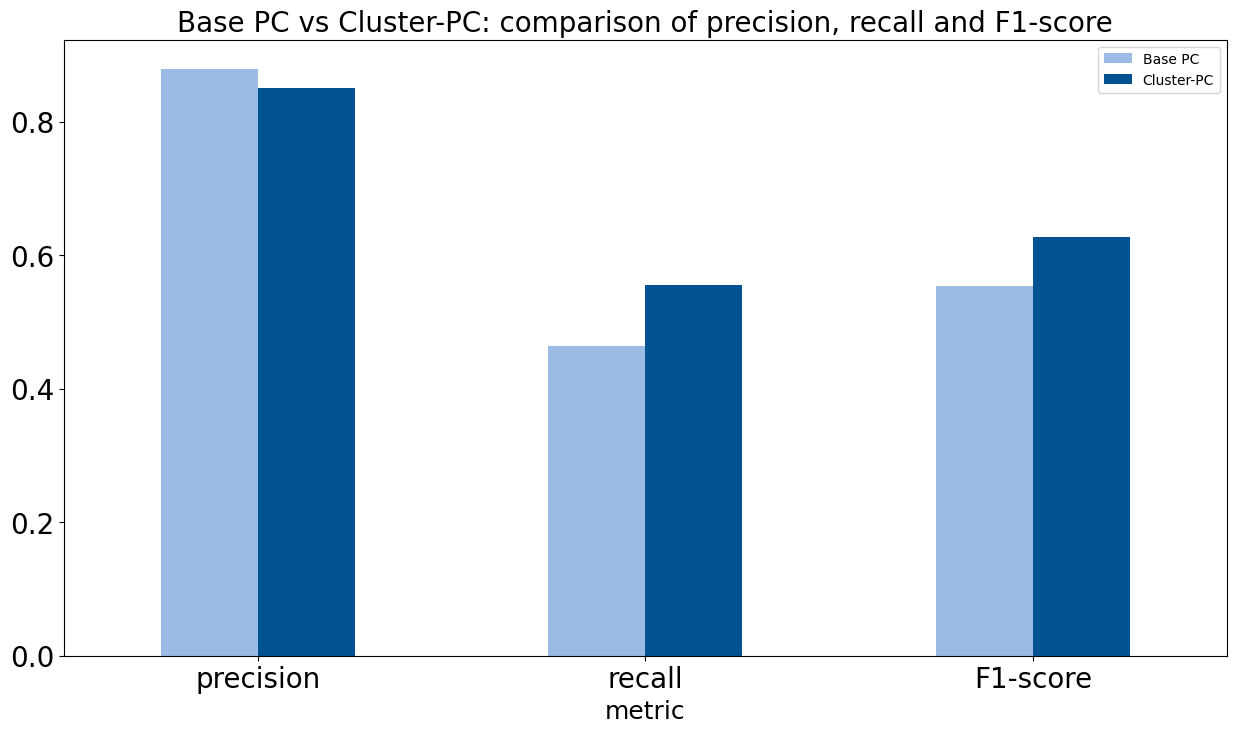

In [22]:
mean_values = data_all[prec_recall_metrics].mean()

# Group data into a new DataFrame
grouped_data = pd.DataFrame({
    'Base PC': [mean_values['base_adj_precision'],mean_values['base_adj_recall'], mean_values['base_adj_f1_score']],
    'Cluster-PC': [mean_values['cluster_adj_precision'], mean_values['cluster_adj_recall'], mean_values['cluster_adj_f1_score']],
})

# Set the index to the group names
grouped_data.index = ['precision', 'recall', 'F1-score' ]

# Plot the data
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#64a0c8', '#005293', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
ax = grouped_data.plot(kind='bar', figsize=(15, 8), color=colors[:2])

# Customizing the plot
plt.title('Base PC vs Cluster-PC: comparison of precision, recall and F1-score', fontsize=20)
plt.xlabel('metric', fontsize=18)
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=20)

# Show the plot
plt.show()

In [23]:
data_nonadj_clusters[prec_recall_metrics].describe()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,0.855379,0.801484,0.618753,0.720603,0.681248,0.733210
std,0.130245,0.146020,0.248258,0.193253,0.189993,0.135662
min,0.176471,0.142857,0.102564,0.280000,0.179775,0.250000
25%,0.791667,0.733333,0.400000,0.555556,0.530612,0.633333
50%,0.875000,0.828571,0.650000,0.750000,0.716981,0.740741
75%,0.947368,0.903226,0.833333,0.888889,0.840000,0.840000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# latex = data_nonadj_clusters[prec_recall_metrics].describe().style.to_latex()
# print(latex)

C-PC has slightly lower true negative and higher true positive. Positive is defined as an edge that is present in the true graph. 

In [25]:
count_metrics_with_pruned = ['base_adj_false_negative', 'pruned_base_adj_false_negative', 'cluster_adj_false_negative', \
                 'base_adj_false_positive', 'pruned_base_adj_false_positive','cluster_adj_false_positive', \
                    'base_adj_true_negative', 'pruned_base_adj_true_negative', 'cluster_adj_true_negative', \
                        'base_adj_true_positive', 'pruned_base_adj_true_positive', 'cluster_adj_true_positive']
count_metrics = ['base_adj_false_negative', 'cluster_adj_false_negative', \
                    'base_adj_false_positive','cluster_adj_false_positive', \
                        'base_adj_true_negative', 'cluster_adj_true_negative', \
                            'base_adj_true_positive', 'cluster_adj_true_positive']
data[count_metrics].describe()

,base_adj_false_negative,cluster_adj_false_negative,base_adj_false_positive,cluster_adj_false_positive,base_adj_true_negative,cluster_adj_true_negative,base_adj_true_positive,cluster_adj_true_positive
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,36.842000,30.000667,2.520667,4.331333,48.716000,46.905333,16.921333,23.762667
std,31.246844,26.446278,2.886369,4.399067,31.898135,31.376478,4.168941,8.696173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,8.000000,6.000000,0.000000,0.000000,25.000000,23.000000,14.000000,18.000000
50%,29.000000,23.000000,2.000000,3.000000,54.000000,52.000000,17.000000,23.000000
75%,61.000000,51.000000,4.000000,7.000000,77.000000,75.000000,19.000000,29.000000
max,96.000000,93.000000,28.000000,36.000000,99.000000,99.000000,32.000000,52.000000


Calculating the total of correctly identified edges ratio: $TCIE = \frac{TP + TN}{TP + TN + FP + FN}$. 

In total C-PC has slightly higher TCIE. 

In [26]:
data['cluster_TCIE'] = (data['cluster_adj_true_positive'] + 
                data['cluster_adj_true_negative']) / (data['cluster_adj_true_positive'] + 
                                                                                        data['cluster_adj_true_negative'] + 
                                                                                        data['cluster_adj_false_positive'] + 
                                                                                        data['cluster_adj_false_negative'])
data['base_TCIE'] = (data['base_adj_true_positive'] +
                data['base_adj_true_negative']) / (data['base_adj_true_positive'] + 
                                                                                        data['base_adj_true_negative'] + 
                                                                                        data['base_adj_false_positive'] + 
                                                                                        data['base_adj_false_negative'])
data[['base_TCIE', 'cluster_TCIE']].describe()

,base_TCIE,cluster_TCIE
count,1500.000000,1500.000000
mean,0.625117,0.673029
std,0.289173,0.238279
min,0.085714,0.114286
25%,0.390476,0.466667
50%,0.685714,0.723810
75%,0.895238,0.885714
max,1.000000,1.000000


All in all one can say that C-PC removes slightly less edges than PC. It doesn't remove as many edges that shouldn't be removed, but also keeps more edges that should be removed. 

C-PC has a slightly lower SHD. If one was to calculate the SID, it would show a similar trend to the SHD. 

In [27]:
dist_metrics_with_pruned = ['base_base_shd', 'pruned_base_pruned_base_shd', 'cluster_cluster_shd', 'empty_graph_shd']#, \
         #   'base_sid_lower', 'base_sid_upper', 'pruned_base_sid_lower', 'pruned_base_sid_upper', \
         #      'cluster_sid_lower', 'cluster_sid_upper']
dist_metrics = ['base_base_shd', 'cluster_cluster_shd', 'empty_graph_shd']#, \
            #   'base_sid_lower', 'base_sid_upper \
            #      'cluster_sid_lower', 'cluster_sid_upper']
data[dist_metrics].describe()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
count,1500.000000,1500.000000,1500.000000
mean,44.805333,37.064667,53.763333
std,32.225783,26.785969,32.800435
min,0.000000,0.000000,6.000000
25%,15.000000,13.000000,26.000000
50%,39.000000,32.000000,47.000000
75%,70.000000,60.000000,77.000000
max,101.000000,97.000000,105.000000


This is the edge density, intra_cluster is number_edges_within_cluster/number_possible_edges_within_cluster, 

inter_cluster is number_edges_between_connected_clusters/number_possible_edges_between_connected_clusters and

inter_including_disconnected_cluster is number_edges_between_all_clusters/number_possible_edges_between_all_clusters.

This means inter_including_disconnected_cluster also has edges between disconnected clusters in the denominator (and is therefore slightly lower).

In [28]:
edge_ratios = data['edge_ratios'].apply(pd.Series)
edge_ratios.columns = ['intra_cluster', 'inter_cluster', 'inter_including_disconnected_cluster']
mean_values = edge_ratios.mean()
mean_values = pd.DataFrame([mean_values])
print('Edge Ratios \n', mean_values)

Edge Ratios 
    intra_cluster  inter_cluster  inter_including_disconnected_cluster
0       0.487773        0.56458                              0.517693


### Grouping by clusters

In [30]:
data_all.groupby('n_clusters')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
n_clusters,,,,,,
1.0,0.873859,0.873859,0.467887,0.467887,0.552960,0.552960
2.0,0.873706,0.857586,0.463733,0.507810,0.551055,0.586960
3.0,0.869332,0.838528,0.463910,0.544516,0.548442,0.613097
4.0,0.876981,0.840817,0.463368,0.564293,0.550572,0.631132
5.0,0.874411,0.842530,0.459140,0.582581,0.547965,0.650559
6.0,0.883543,0.843839,0.463424,0.597262,0.555450,0.663910
7.0,0.900778,0.860855,0.471772,0.622757,0.566243,0.688039


In [33]:
print(data_all.groupby('n_clusters')[prec_recall_metrics].mean().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & base_adj_precision & cluster_adj_precision & base_adj_recall & cluster_adj_recall & base_adj_f1_score & cluster_adj_f1_score \\
n_clusters &  &  &  &  &  &  \\
\midrule
1.000000 & 0.873859 & 0.873859 & 0.467887 & 0.467887 & 0.552960 & 0.552960 \\
2.000000 & 0.873706 & 0.857586 & 0.463733 & 0.507810 & 0.551055 & 0.586960 \\
3.000000 & 0.869332 & 0.838528 & 0.463910 & 0.544516 & 0.548442 & 0.613097 \\
4.000000 & 0.876981 & 0.840817 & 0.463368 & 0.564293 & 0.550572 & 0.631132 \\
5.000000 & 0.874411 & 0.842530 & 0.459140 & 0.582581 & 0.547965 & 0.650559 \\
6.000000 & 0.883543 & 0.843839 & 0.463424 & 0.597262 & 0.555450 & 0.663910 \\
7.000000 & 0.900778 & 0.860855 & 0.471772 & 0.622757 & 0.566243 & 0.688039 \\
\bottomrule
\end{tabular}



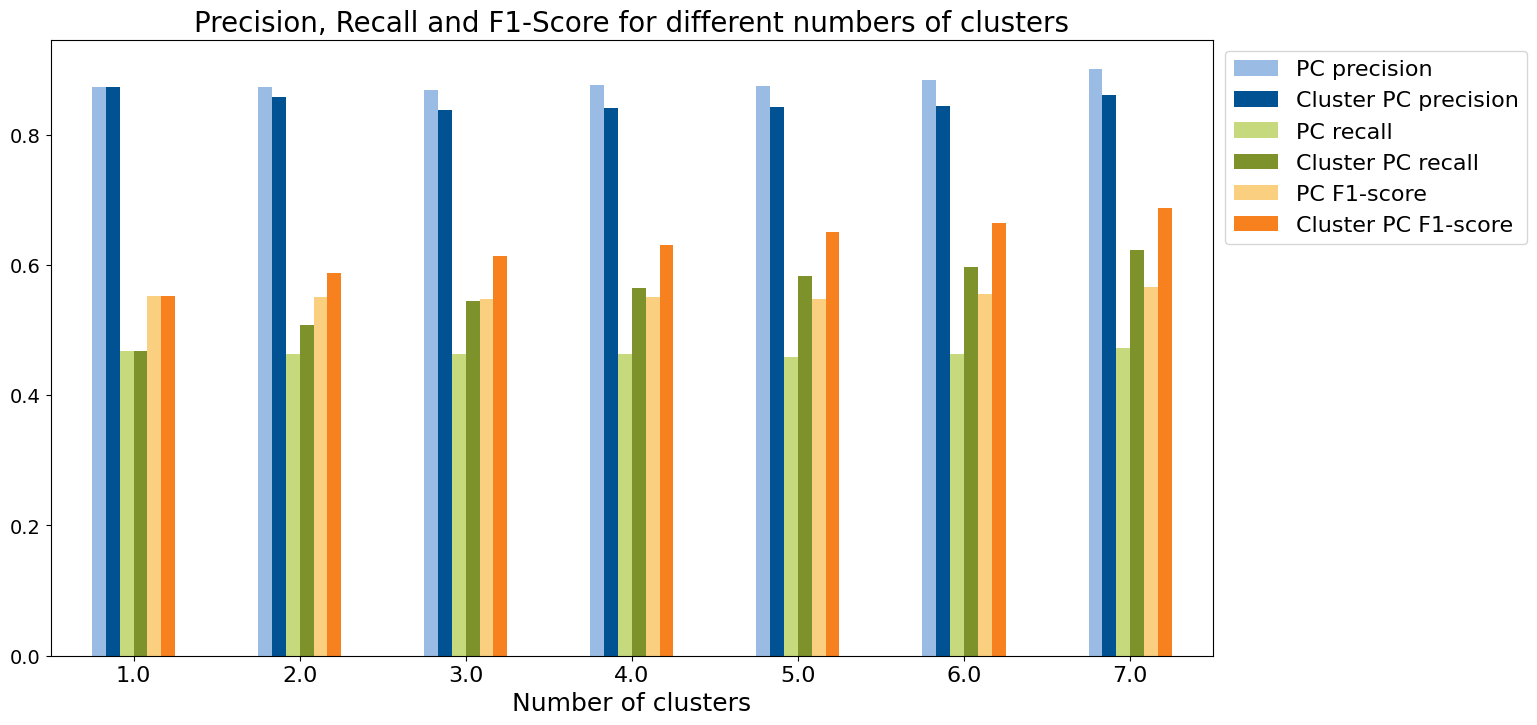

In [34]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
# colors = ['#64a0c8', '#005293', '#8F81EA', '#6955E2', '#FAD080', '#F7811E']
data_all.groupby('n_clusters')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for different numbers of clusters', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names,  bbox_to_anchor = (1.28, 1),  fontsize=16, loc='upper right')
# prec_recall_clusters_diagram.pdf
plt.savefig('imgs/prec_recall_clusters_diagram.pdf', bbox_inches='tight')

In [35]:
# # colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
# data_nonadj_clusters.groupby('n_clusters').mean()[prec_recall_metrics].plot(kind='bar', figsize=(15, 8), color = colors)
# plt.title('Precision, Recall and F1-Score for different numbers of clusters for not fully connected C-DAGs', fontsize = 20)
# plt.xlabel('Number of clusters', fontsize=18)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
# plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
# label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
# plt.legend(label_names,  bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [37]:
data_all.groupby('n_clusters')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
n_clusters,,,
1.0,45.060,45.060,53.812
2.0,45.100,41.996,54.076
3.0,45.128,39.664,53.860
4.0,45.032,37.608,53.672
5.0,45.292,36.108,53.864
6.0,44.284,34.464,53.680
7.0,43.996,32.548,53.428


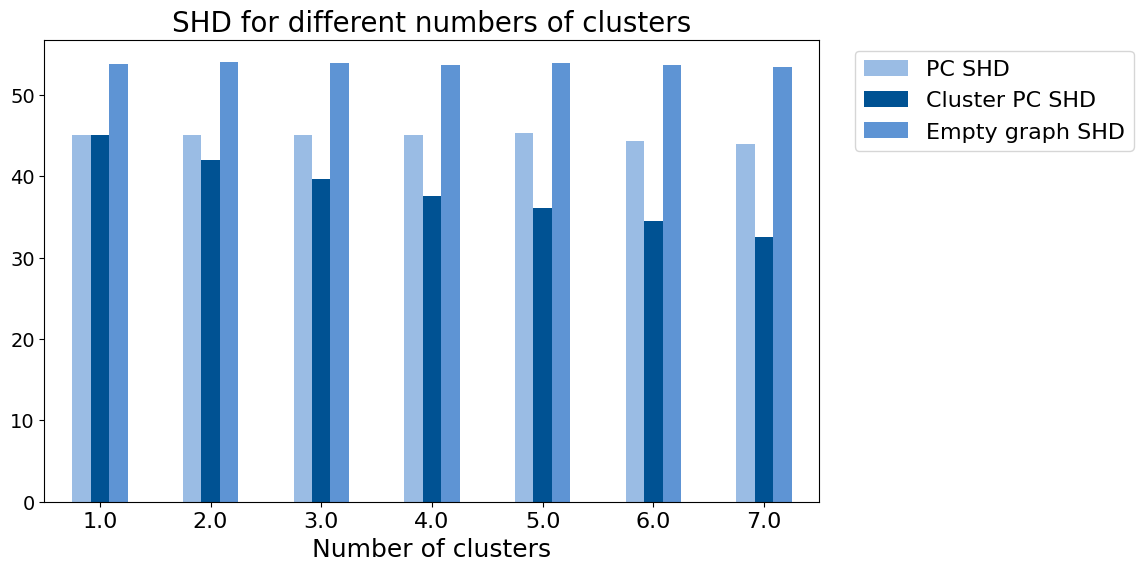

In [39]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data_all.groupby('n_clusters')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different numbers of clusters', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

In [41]:
data_nonadj_clusters.groupby('n_clusters')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
n_clusters,,,
3.0,16.621622,15.540541,24.324324
4.0,19.227723,17.425743,27.029703
5.0,22.221429,18.007143,30.292857
6.0,24.718750,19.987500,33.843750
7.0,29.874346,22.047120,38.790576


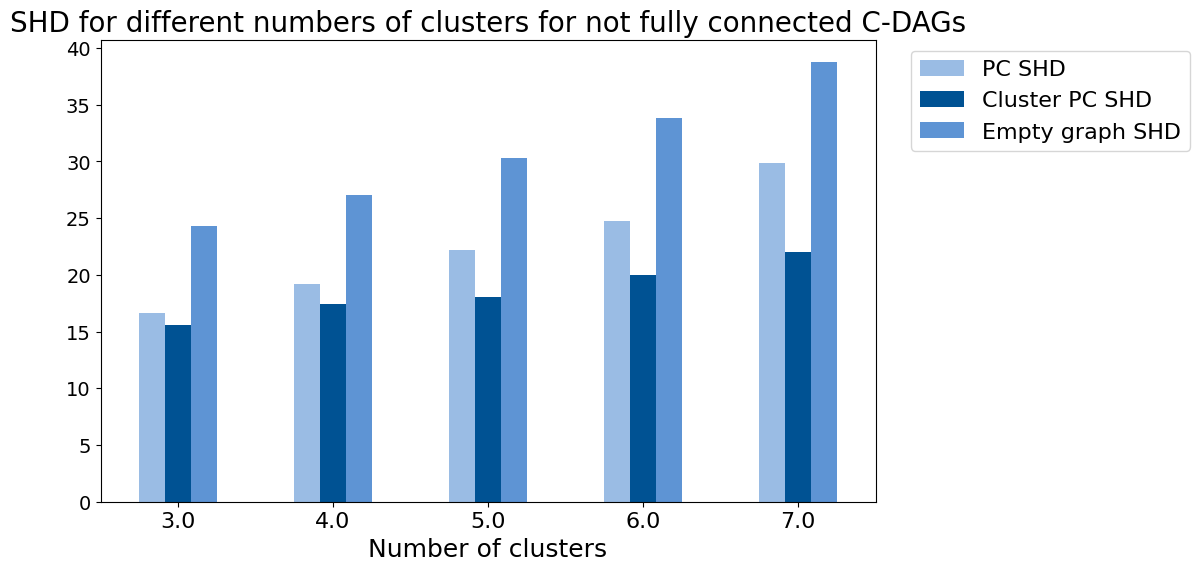

In [43]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data_nonadj_clusters.groupby('n_clusters')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different numbers of clusters for not fully connected C-DAGs', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

Goes up as less C-DAGs are fully connected at 5,6 or 7 clusters

In [45]:
indep_test_metrics = ['Base indep tests', 'C-PC indep tests']
data_all.groupby('n_clusters')[indep_test_metrics].mean()

,Base indep tests,C-PC indep tests
n_clusters,,
1.0,4985.484,4985.484
2.0,5021.704,3854.712
3.0,4974.088,3140.348
4.0,5056.860,2781.332
5.0,4992.824,2435.812
6.0,4922.968,2200.856
7.0,4913.820,2038.760


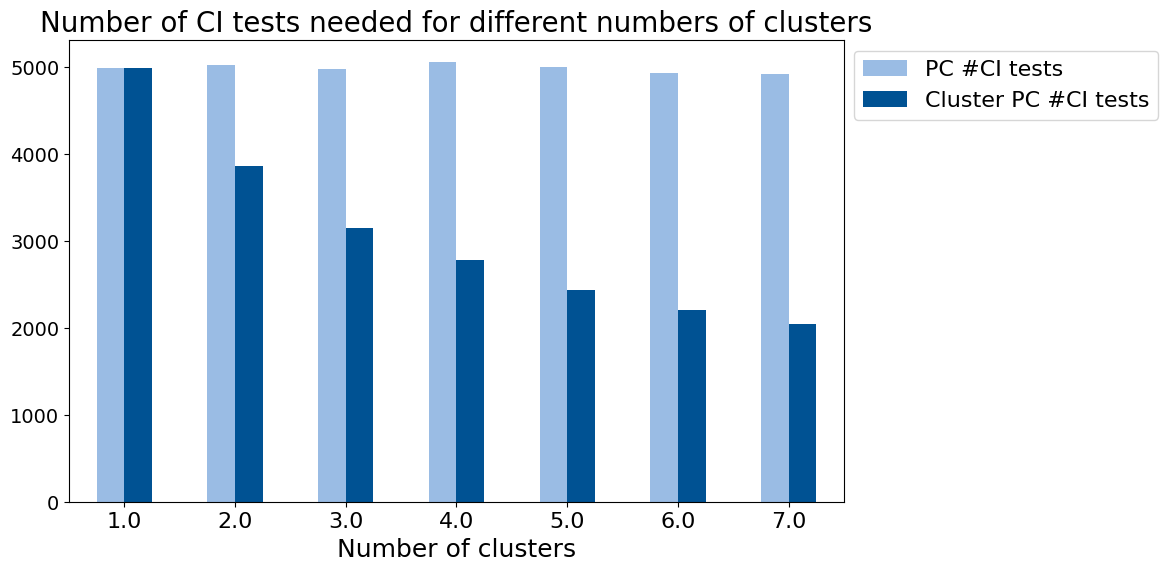

In [46]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data_all.groupby('n_clusters')[indep_test_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('Number of CI tests needed for different numbers of clusters', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC #CI tests', 'Cluster PC #CI tests']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')
plt.savefig('imgs/ci_tests_clusters_diagram.pdf', bbox_inches='tight')

### Grouping by alpha

In [47]:
data.groupby('alpha')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
alpha,,,,,,
0.01,0.927705,0.913809,0.419237,0.517688,0.531467,0.630013
0.05,0.914228,0.891478,0.441153,0.547143,0.547230,0.644641
0.10,0.898180,0.872393,0.466170,0.572885,0.563608,0.656502
0.25,0.856166,0.813571,0.480944,0.587032,0.559977,0.637702
0.50,0.802681,0.745544,0.513620,0.624601,0.564157,0.625890


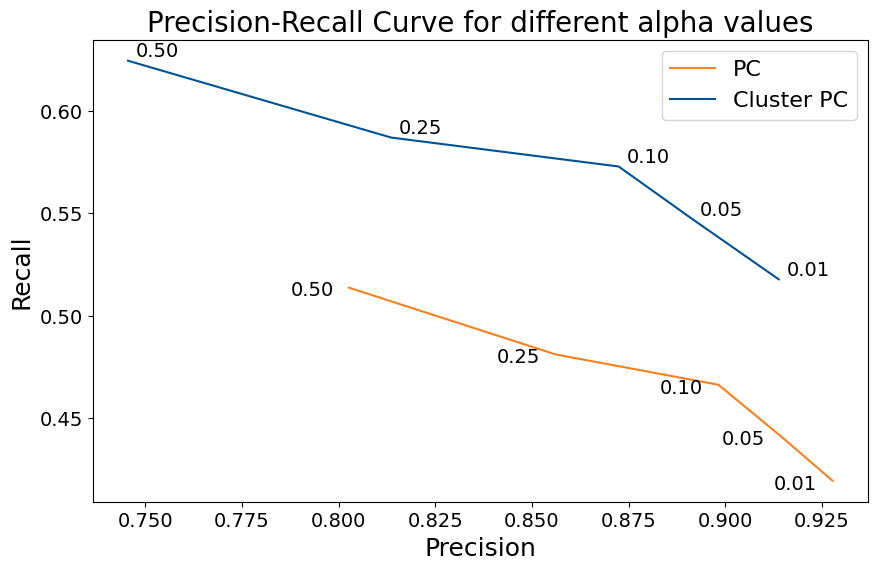

In [48]:
import matplotlib.pyplot as plt

# Calculate the mean values for the precision-recall metrics grouped by 'alpha'
grouped_data = data.groupby('alpha')[prec_recall_metrics].mean()

fig, ax = plt.subplots(figsize=(10, 6))

# Plot for PC
ax.plot(grouped_data['base_adj_precision'], grouped_data['base_adj_recall'], color='#F7811E', label='PC')
# Annotate alpha values for PC
for alpha, x, y in zip(grouped_data.index, grouped_data['base_adj_precision'], grouped_data['base_adj_recall']):
    offset = 0.004
    ax.text(x - offset, y - offset, f'{alpha:.2f}', fontsize=14, ha='right')

# Plot for Cluster PC
ax.plot(grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall'], color='#005293', label='Cluster PC')
# Annotate alpha values for Cluster PC
for alpha, x, y in zip(grouped_data.index, grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall']):
    offset = 0.002
    ax.text(x + offset, y + offset, f'{alpha:.2f}', fontsize=14, ha='left')

# Set title and labels
ax.set_title('Precision-Recall Curve for different alpha values', fontsize=20)
ax.set_xlabel('Precision', fontsize=18)
ax.set_ylabel('Recall', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

# Display legend
ax.legend(fontsize=16)
plt.savefig('imgs/prec_recall_alpha_curve.pdf', format='pdf')
plt.show()


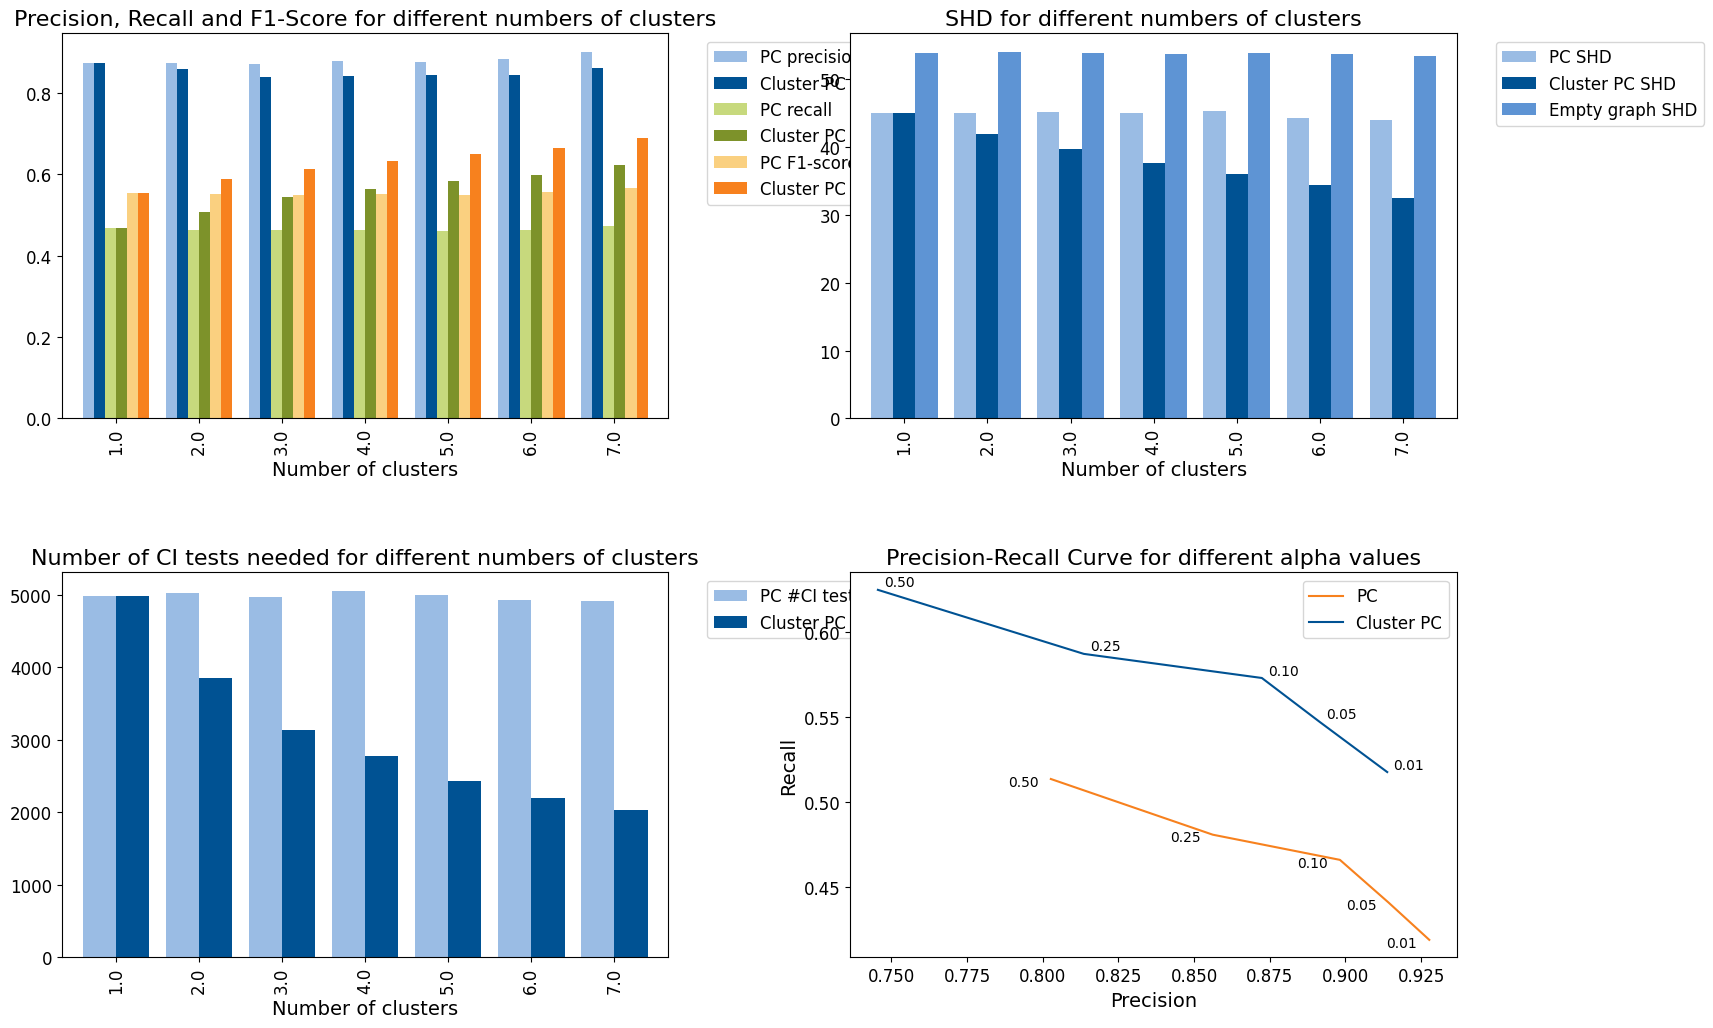

In [50]:
# combined seaborn plot
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
colors_prec_recall = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E']
colors_shd = ['#9ABCE4', '#005293', '#5E94D4']
colors_ci_tests = ['#9ABCE4', '#005293']

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot 1: Precision, Recall, and F1-Score for different numbers of clusters
data_all.groupby('n_clusters')[prec_recall_metrics].mean().plot(
    kind='bar', ax=axes[0, 0], color=colors_prec_recall, width=0.8)
axes[0, 0].set_title('Precision, Recall and F1-Score for different numbers of clusters', fontsize=16)
axes[0, 0].set_xlabel('Number of clusters', fontsize=14)
axes[0, 0].tick_params(axis='both', labelsize=12)
axes[0, 0].legend(
    ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score'],
    bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Plot 2: SHD for different numbers of clusters
data_all.groupby('n_clusters')[dist_metrics].mean().plot(
    kind='bar', ax=axes[0, 1], color=colors_shd, width=0.8)
axes[0, 1].set_title('SHD for different numbers of clusters', fontsize=16)
axes[0, 1].set_xlabel('Number of clusters', fontsize=14)
axes[0, 1].tick_params(axis='both', labelsize=12)
axes[0, 1].legend(['PC SHD', 'Cluster PC SHD', 'Empty graph SHD'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Plot 3: Number of CI tests needed for different numbers of clusters
data_all.groupby('n_clusters')[indep_test_metrics].mean().plot(
    kind='bar', ax=axes[1, 0], color=colors_ci_tests, width=0.8)
axes[1, 0].set_title('Number of CI tests needed for different numbers of clusters', fontsize=16)
axes[1, 0].set_xlabel('Number of clusters', fontsize=14)
axes[1, 0].tick_params(axis='both', labelsize=12)
axes[1, 0].legend(['PC #CI tests', 'Cluster PC #CI tests'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Plot 4: Precision-Recall Curve for different alpha values
grouped_data = data.groupby('alpha')[prec_recall_metrics].mean()
axes[1, 1].plot(grouped_data['base_adj_precision'], grouped_data['base_adj_recall'], color='#F7811E', label='PC')
axes[1, 1].plot(grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall'], color='#005293', label='Cluster PC')

# Annotate alpha values on the plot
for alpha, x, y in zip(grouped_data.index, grouped_data['base_adj_precision'], grouped_data['base_adj_recall']):
    axes[1, 1].text(x - 0.004, y - 0.004, f'{alpha:.2f}', fontsize=10, ha='right')
for alpha, x, y in zip(grouped_data.index, grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall']):
    axes[1, 1].text(x + 0.002, y + 0.002, f'{alpha:.2f}', fontsize=10, ha='left')

axes[1, 1].set_title('Precision-Recall Curve for different alpha values', fontsize=16)
axes[1, 1].set_xlabel('Precision', fontsize=14)
axes[1, 1].set_ylabel('Recall', fontsize=14)
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].legend(fontsize=12)

# Save the combined figure
plt.savefig('combined_plots.pdf', bbox_inches='tight')
plt.show()


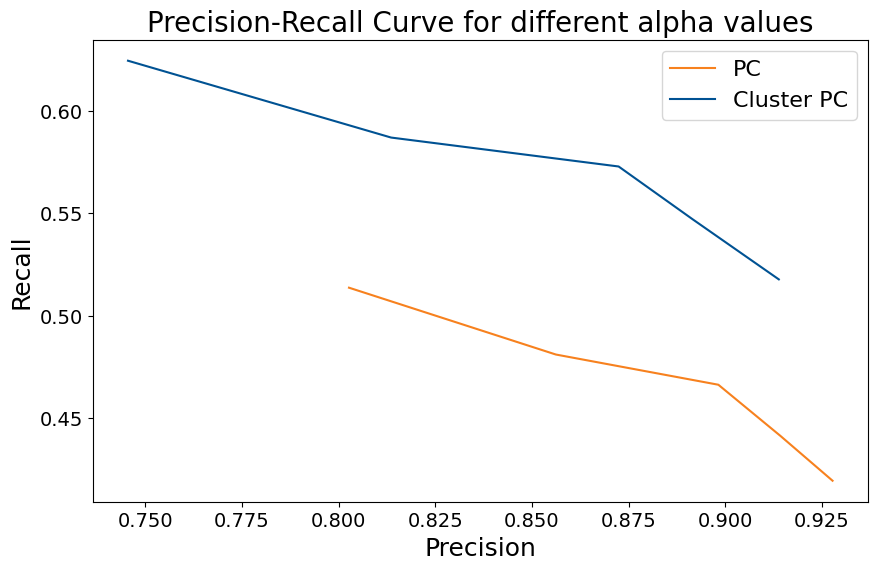

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
# colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
ax.plot(data.groupby('alpha')['base_adj_precision'].mean(), data.groupby('alpha')['base_adj_recall'].mean(), color = '#F7811E')
ax.plot(data.groupby('alpha')['cluster_adj_precision'].mean(), data.groupby('alpha')['cluster_adj_recall'].mean(), color = '#005293')
ax.set_title('Precision-Recall Curve for different alpha values', fontsize = 20)
ax.set_xlabel('Precision', fontsize=18)
ax.set_ylabel('Recall', fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.legend(['PC', 'Cluster PC'], fontsize=16)

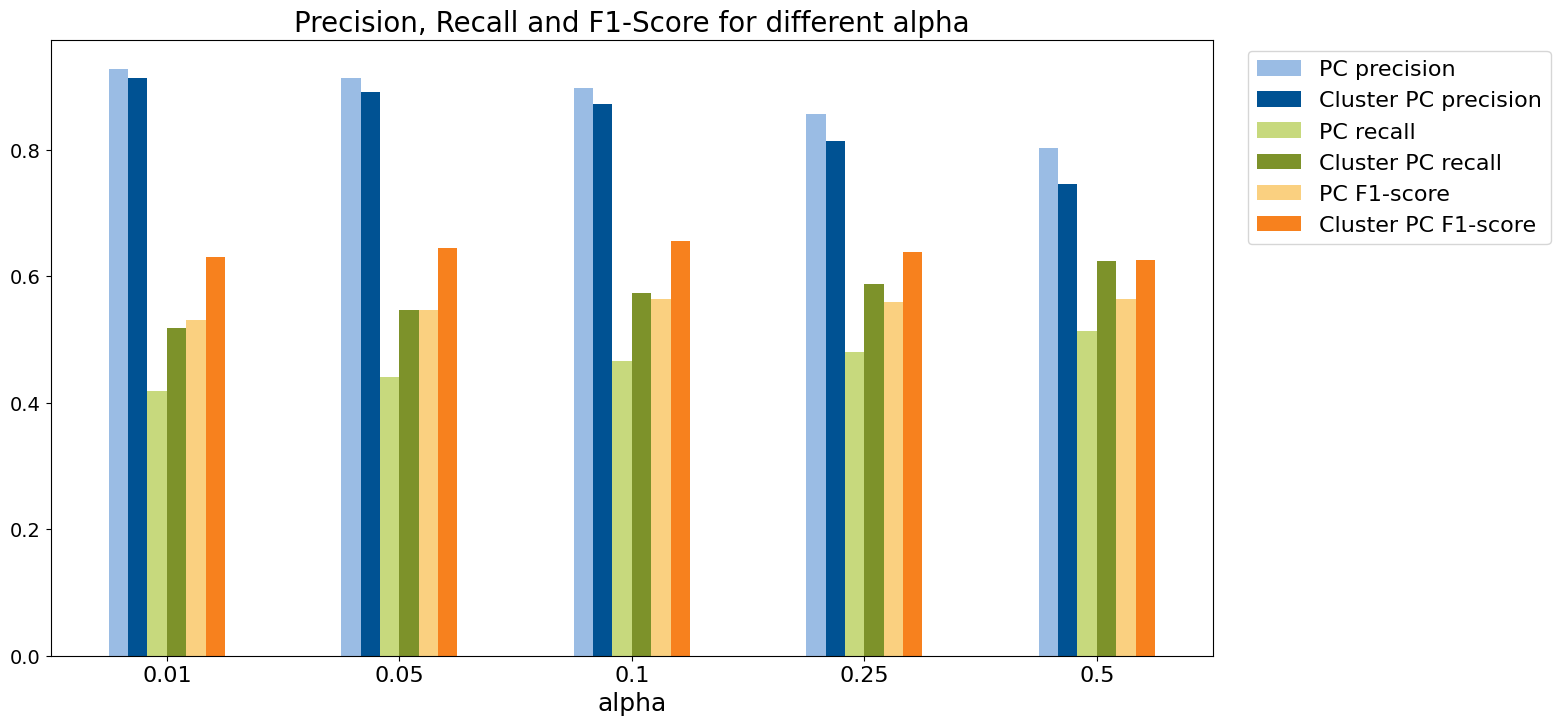

In [54]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
data.groupby('alpha')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for different alpha', fontsize = 20)
plt.xlabel('alpha', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [56]:
data.groupby('alpha')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
alpha,,,
0.01,44.480000,37.470000,53.833333
0.05,44.210000,36.573333,53.830000
0.10,43.900000,35.703333,53.473333
0.25,45.313333,37.456667,54.060000
0.50,46.123333,38.120000,53.620000


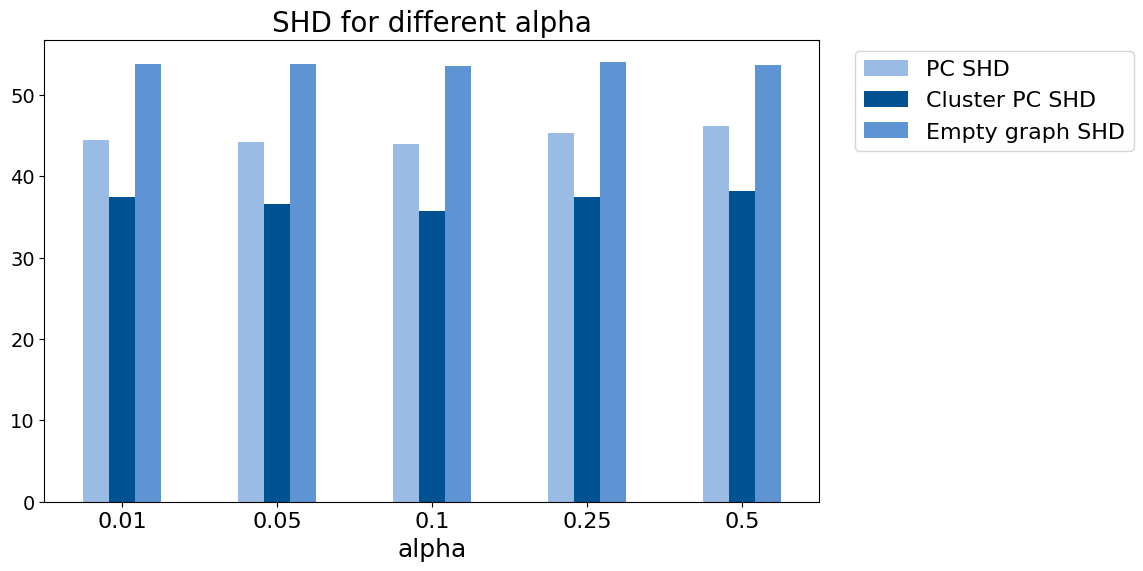

In [58]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data.groupby('alpha')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different alpha', fontsize = 20)
plt.xlabel('alpha', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by distribution type


In [60]:
data.groupby('distribution_type')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
distribution_type,,,,,,
gauss,0.879792,0.847359,0.464224,0.56987,0.553288,0.63895


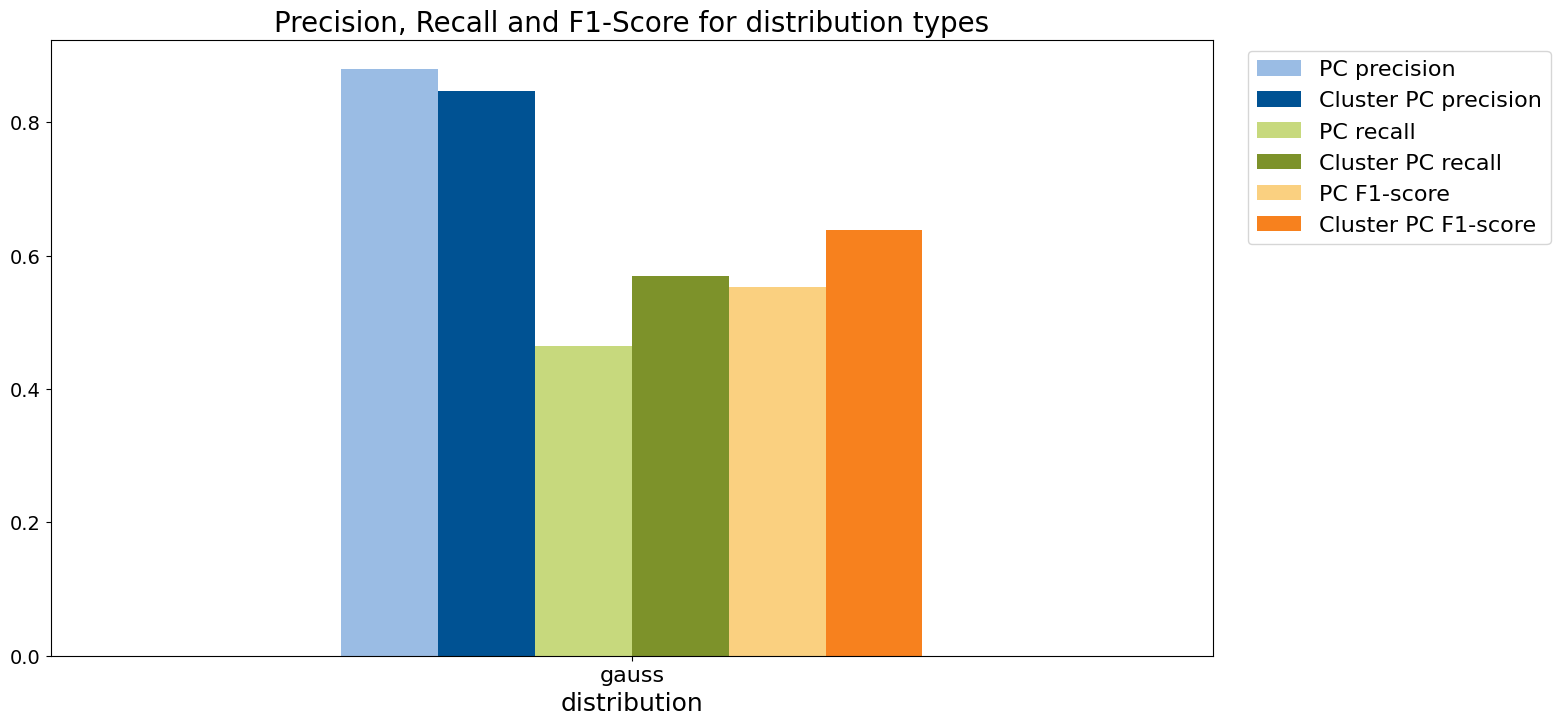

In [62]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
data.groupby('distribution_type')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for distribution types', fontsize = 20)
plt.xlabel('distribution', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [64]:
data.groupby('distribution_type')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
distribution_type,,,
gauss,44.805333,37.064667,53.763333


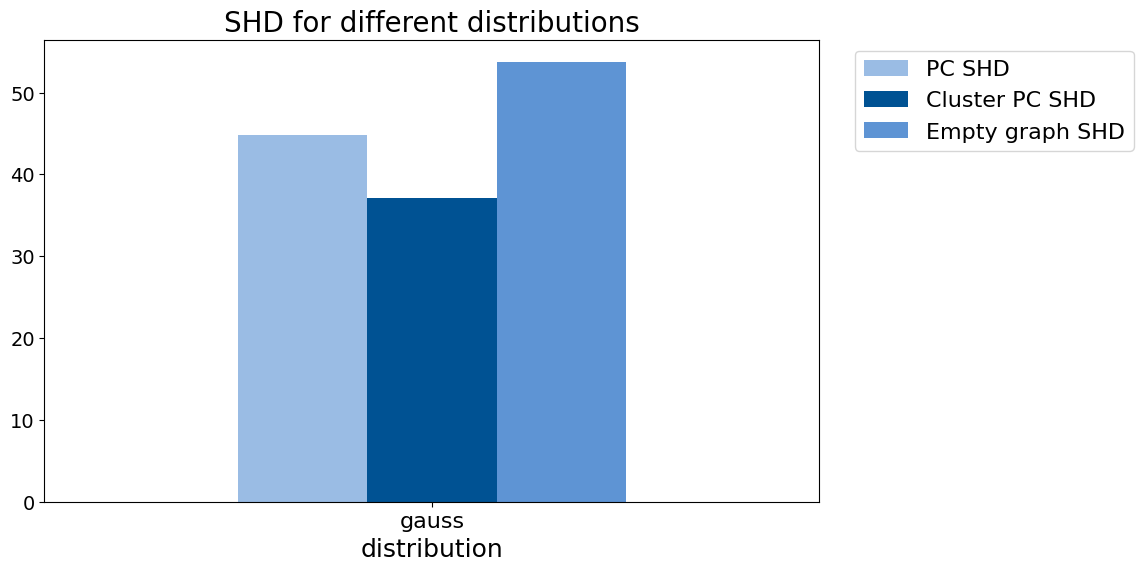

In [66]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data.groupby('distribution_type')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different distributions', fontsize = 20)
plt.xlabel('distribution', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by DAG method

In [68]:
data.groupby('dag_method')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
dag_method,,,,,,
erdos_renyi,0.879792,0.847359,0.464224,0.56987,0.553288,0.63895


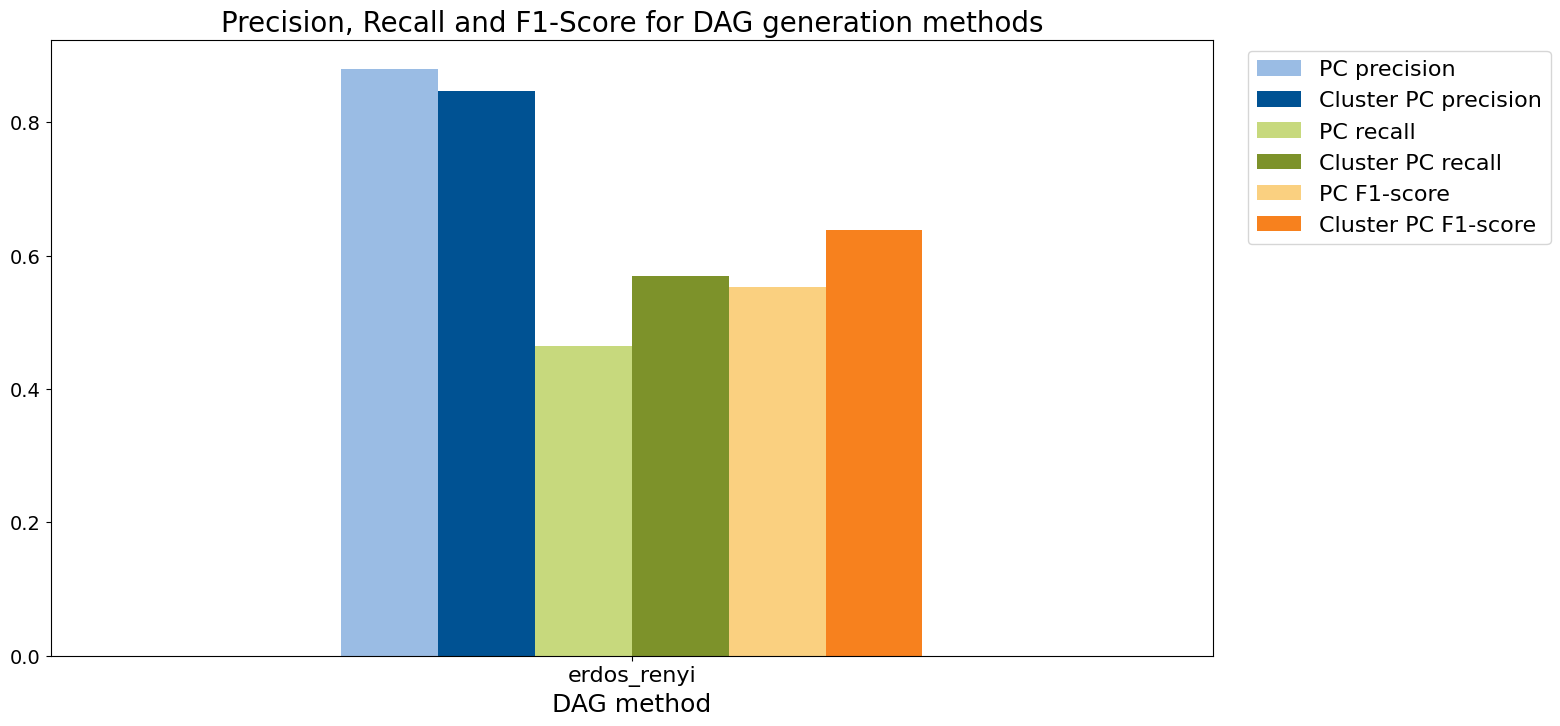

In [70]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
data.groupby('dag_method')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for DAG generation methods', fontsize = 20)
plt.xlabel('DAG method', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [72]:
data.groupby('dag_method')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
dag_method,,,
erdos_renyi,44.805333,37.064667,53.763333


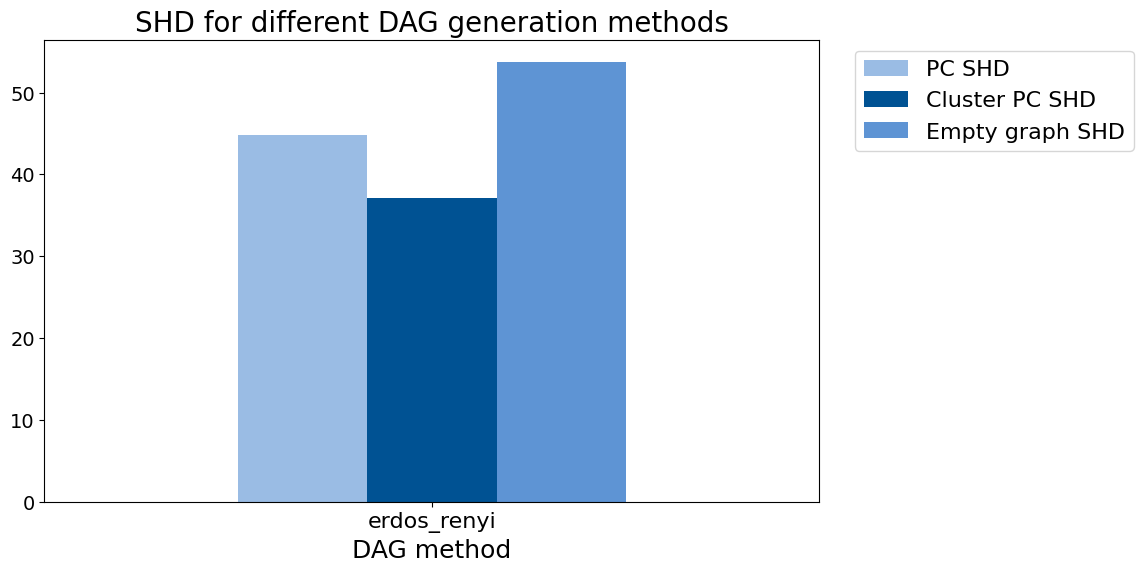

In [74]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data.groupby('dag_method')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different DAG generation methods', fontsize = 20)
plt.xlabel('DAG method', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by #edges

In [76]:
data.groupby('n_edges')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
n_edges,,,,,,
15.0,0.830497,0.767985,0.880382,0.906289,0.838203,0.810945
30.0,0.880471,0.822989,0.637304,0.725865,0.733912,0.764065
50.0,0.831338,0.801376,0.386467,0.523846,0.522394,0.627265
80.0,0.856654,0.844445,0.232207,0.370651,0.362441,0.509461
150.0,1.000000,1.000000,0.184762,0.322698,0.309491,0.483012


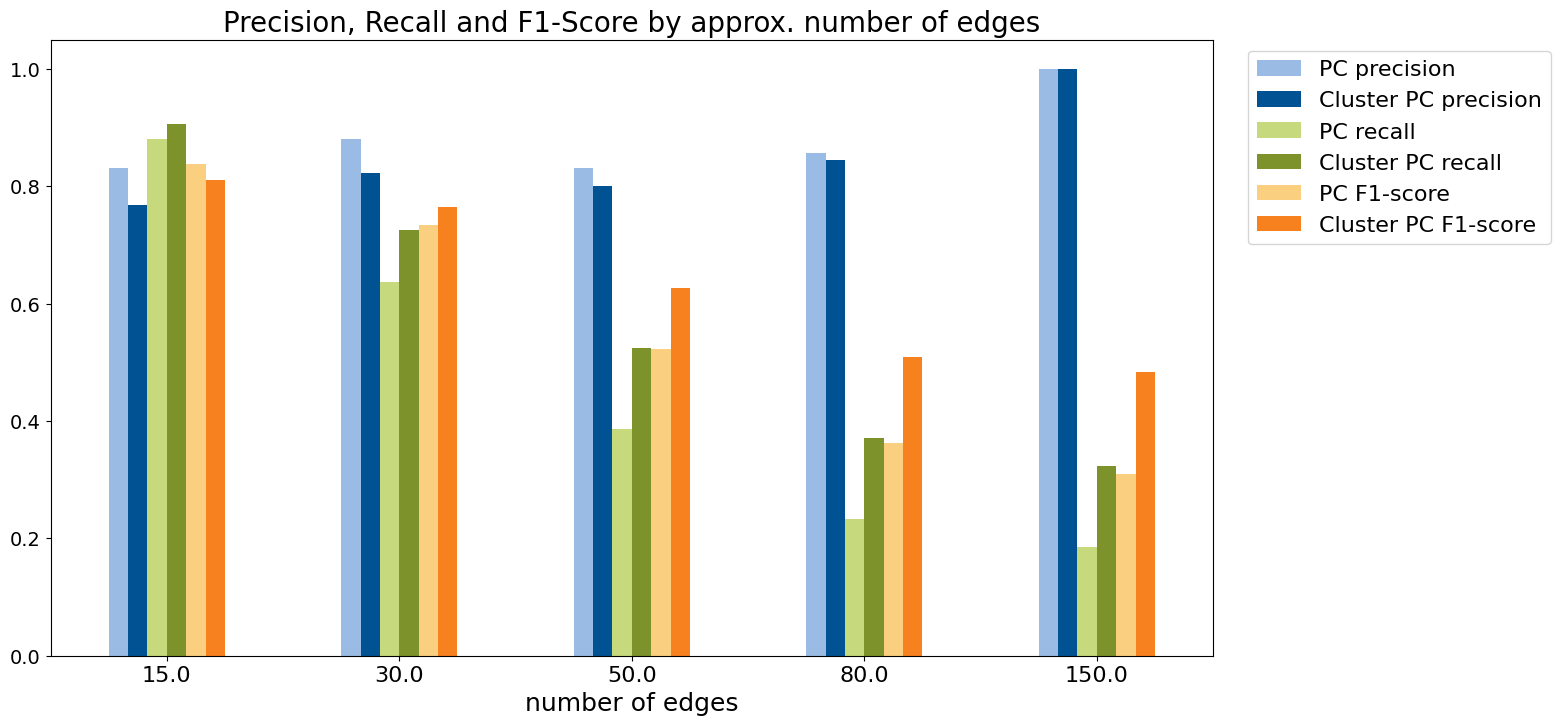

In [78]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
data.groupby('n_edges')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score by approx. number of edges', fontsize = 20)
plt.xlabel('number of edges', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [80]:
data.groupby('n_edges')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
n_edges,,,
15.0,7.193333,7.320000,14.160000
30.0,17.823333,14.463333,28.643333
50.0,38.770000,31.430000,46.743333
80.0,66.793333,55.876667,74.270000
150.0,93.446667,76.233333,105.000000


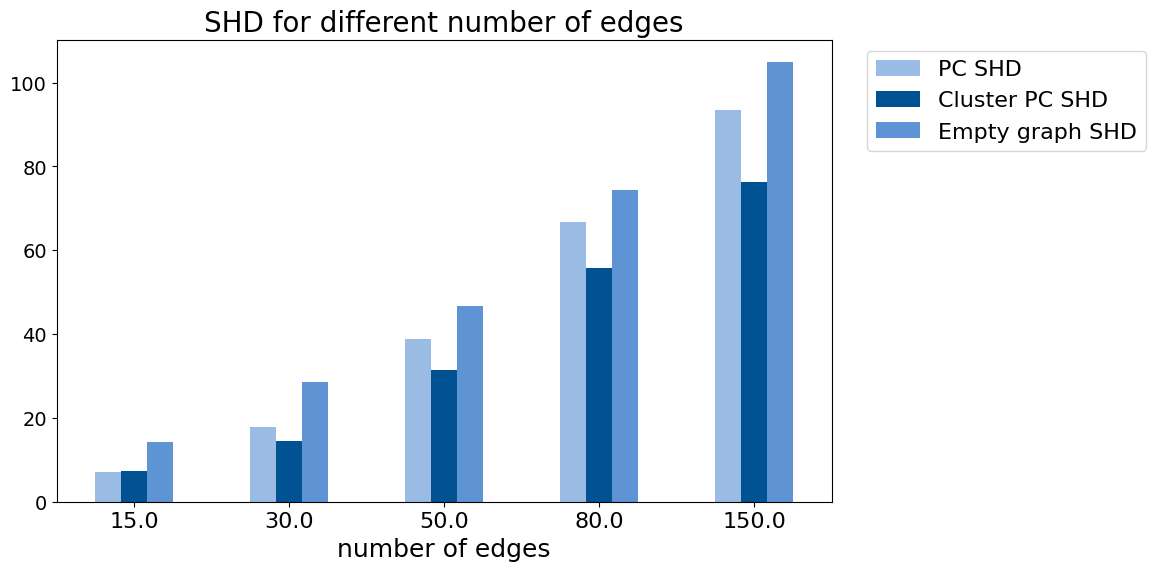

In [82]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data.groupby('n_edges')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different number of edges', fontsize = 20)
plt.xlabel('number of edges', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')